# BayesTME Demo

In this notebook we will demonstrate running the bayestme pipeline end to end on a sample dataset.

We will use a very small simulated dataset for this demo such that this notebook can be fully executed quickly and with a small amount of resources.

In [46]:
from bayestme import data

locations, tissue_mask, true_rates, true_counts, bleed_counts = bleeding_correction.generate_data(
    n_rows=12,
    n_cols=12,
    n_genes=10)

stdata = data.SpatialExpressionDataset(
    raw_counts=bleed_counts,
    tissue_mask=tissue_mask,
    positions=locations.T,
    gene_names=np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']),
    layout=data.Layout.SQUARE
)

0
100


Below is a visualization of the raw count data for one gene to give a sense of what this simulated dataset looks like.

Plot saved as ./1_raw_counts.png


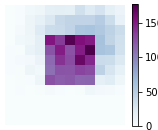

In [47]:
import numpy as np
from bayestme import plotting
from IPython.display import Image

plotting.plot_gene_raw_counts(
    stdata,
    gene='1',
    output_format='png',
    output_dir='.')

Image(filename='1_raw_counts.png', unconfined=True) 

Once we have loaded our ST dataset, we need to do some preprocessing to filter down the number of gene markers. Gene markers can be redundant for our analysis if their count data does not vary across the tissue, or if they are universally expressed across the tissue sample.

In [58]:
len(stdata.gene_names)

10

We will filter this down to 5 genes that have the most information content for our analysis.

In [78]:
from bayestme import gene_filtering

stdata_stddev_filtered = gene_filtering.select_top_genes_by_standard_deviation(
    stdata, n_gene=5)

In [79]:
len(stdata_stddev_filtered.gene_names)

5

Now that we have filtered the gene markers down, we perform bleeding correction

The `n_top` parameter controls how many of the filtered gene markers we want to consider for this analysis. We will just use a few for the purposes of this demonstration to make the computation faster.

In [81]:
from bayestme import bleeding_correction

cleaned_dataset, bleed_correction_result = bleeding_correction.clean_bleed(
    dataset=stdata_stddev_filtered,
    n_top=3,
    local_weight=None
)

Fitting basis functions to first 3 genes

Step 1/5
	Loss: 886.29

Step 2/5
	Loss: 573.31

Step 3/5
	Loss: 560.69

Step 4/5
	Loss: 531.64

Step 5/5
	Loss: 525.19

Gene 1/5

Gene 2/5

Gene 3/5

Gene 4/5

Gene 5/5


In [82]:
bleeding_correction.create_top_n_gene_bleeding_plots(
    dataset=stdata_stddev_filtered,
    corrected_dataset=cleaned_dataset,
    bleed_result=bleed_correction_result,
    output_dir='.',
    n_genes=5
)

Plot saved as ./9_bleeding_plot.pdf
Plot saved as ./4_bleeding_plot.pdf
Plot saved as ./8_bleeding_plot.pdf
Plot saved as ./2_bleeding_plot.pdf
Plot saved as ./3_bleeding_plot.pdf
